# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;"> &#9989; Ronnit Chopra </p>
# <p style="text-align: right;"> &#9989; KlutzyFella </p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

``` bash
git clone http://github.com/KlutzyFella/CMSE202-f25-turnin/
```

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [54]:
# put your code here
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")

# Display the first few rows of the dataset
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


How many patients are in this dataset? What are features of the patients?

In [55]:
# Number of patients
num_patients = diabetes_data.shape[0]
print(f"Number of patients: {num_patients}")

# Features of the patients
features = diabetes_data.columns.tolist()
print(f"Features of the patients: {features}")

Number of patients: 100000
Features of the patients: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


```
There are a 100000 patients and the features are 'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'
```

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [56]:
diabetes_data['gender'] = diabetes_data['gender'].map({
    'Female': 0,
    'Male': 1,
    'Other': 2
})

diabetes_data['smoking_history'] = diabetes_data['smoking_history'].map({
    'never': 0,
    'former': 1,
    'current': 2,
    'No Info': 3,
    'not current': 4,
    'ever': 5
})

diabetes_data['diabetes'] = diabetes_data['diabetes'].map({
    0: -1,
    1: 1
})

print(diabetes_data[['gender', 'smoking_history', 'diabetes']].head(10))


   gender  smoking_history  diabetes
0       0                0        -1
1       0                3        -1
2       1                0        -1
3       0                2        -1
4       1                2        -1
5       0                0        -1
6       0                0         1
7       0                3        -1
8       1                0        -1
9       0                0        -1


### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [57]:
# copy your perceptron class to his cell
# put your code here
class PerceptronF():

    def __init__(self, labeled_data, iters, learning_rate):
        # Initialize attributes: data, weights, iterations, learning rate
        self.data = np.array(labeled_data)
        self.weights = np.ones(self.data.shape[1])
        self.iters = iters
        self.learning_rate = learning_rate

    def predict(self, feature_set):
        # Add bias term to the feature set
        feature_set_with_bias = np.insert(feature_set, 0, 1)
        # Compute the dot product and apply the activation function
        result = np.dot(self.weights, feature_set_with_bias)
        return 1 if result > 0 else -1

    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                # Extract features and label
                features = row[:-1]
                label = row[-1]
                # Predict the label
                prediction = self.predict(features)
                # Update weights if prediction is incorrect
                if prediction != label:
                    update = self.learning_rate * (label - prediction)
                    # Update weights including bias
                    self.weights[1:] += update * features
                    self.weights[0] += update  # Update bias weight

    def errors(self):
        error_count = 0
        for row in self.data:
            # Extract features and label
            features = row[:-1]
            label = row[-1]
            # Predict the label
            prediction = self.predict(features)
            # Count errors
            if prediction != label:
                error_count += 1
        print(f"Number of errors: {error_count}")
        print(f"Current weights: {self.weights[1:]}")
        print(f"Bias weight: {self.weights[0]}")

* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [60]:
# Select features and labels after conversion
feature_columns = ['gender', 'age', 'hypertension', 'heart_disease',
                   'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = diabetes_data[feature_columns].values
y = diabetes_data['diabetes'].values

# Scale features (because your perceptron needs it)
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Prepare training data
train_data_for_perceptron = np.hstack((X_train, y_train.reshape(-1, 1)))

# Train perceptron
perceptron = PerceptronF(labeled_data=train_data_for_perceptron, iters=100, learning_rate=0.1)
perceptron.fit()


* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [61]:
# put your code here

# Predict and calculate test accuracy
correct_predictions = 0
for features, true_label in zip(X_test, y_test):
    prediction = perceptron.predict(features)
    if prediction == true_label:
        correct_predictions += 1

accuracy = correct_predictions / len(y_test)
print(f"Perceptron Test Accuracy: {accuracy:.4f}")

Perceptron Test Accuracy: 0.9354


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [62]:
# put your code here
best_accuracy = 0
best_iters = None
best_lr = None

for iters in [100, 200, 300, 500]:
    for lr in [0.01, 0.05, 0.1, 0.2]:
        # Prepare training data
        train_data_for_perceptron = np.hstack((X_train, y_train.reshape(-1, 1)))

        # Train perceptron with different parameters
        perceptron = PerceptronF(labeled_data=train_data_for_perceptron, iters=iters, learning_rate=lr)
        perceptron.fit()

        # Evaluate on test set
        correct_predictions = 0
        for features, true_label in zip(X_test, y_test):
            prediction = perceptron.predict(features)
            if prediction == true_label:
                correct_predictions += 1
        accuracy = correct_predictions / len(y_test)

        # If this model is the best so far, record it
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_iters = iters
            best_lr = lr

        print(f"iters={iters}, learning_rate={lr}, accuracy={accuracy:.4f}")

# Final best result
print("\nBest Accuracy:")
print(f"Iterations: {best_iters}")
print(f"Learning Rate: {best_lr}")
print(f"Test Accuracy: {best_accuracy:.4f}")



iters=100, learning_rate=0.01, accuracy=0.9473
iters=100, learning_rate=0.05, accuracy=0.9447
iters=100, learning_rate=0.1, accuracy=0.9354
iters=100, learning_rate=0.2, accuracy=0.9029
iters=200, learning_rate=0.01, accuracy=0.9395


KeyboardInterrupt: 

```
As we can see, it was taking too long to run through all iterations so I might decide to run this later but for now the pattern suggests that 
iter = 100, and learning_rate = 0.01 gave the best accuracy of 0.9473
```

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [65]:
# Download and load the dataset. Convert non-numerical labels to numerics.
# put your code here

# put your code here
telecust_data = pd.read_csv("telecust.csv")

# Map customer categories to numbers
custcat_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3
}

telecust_data['custcat'] = telecust_data['custcat'].map(custcat_mapping)

# Check first few rows after mapping
telecust_data.head()


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,0
1,3,11,33,136,1,7,5,5,0,0,6,3
2,3,68,52,116,1,24,1,29,0,1,2,2
3,2,33,33,33,0,12,2,0,0,1,1,0
4,2,23,30,30,1,9,1,2,0,0,4,2


---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [67]:
# put your modified perceptron class here

class PerceptronF():

    def __init__(self, labeled_data, iters, learning_rate):
        # Initialize attributes: data, weights, iterations, learning rate
        self.data = np.array(labeled_data)
        self.weights = np.ones(self.data.shape[1])
        self.iters = iters
        self.learning_rate = learning_rate

    def predict(self, feature_set):
        # Add bias term to the feature set
        feature_set_with_bias = np.insert(feature_set, 0, 1)
        # Compute the dot product and apply the activation function
        result = np.dot(self.weights, feature_set_with_bias)
        return 1 if result > 0 else -1

    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                # Extract features and label
                features = row[:-1]
                label = row[-1]
                # Predict the label
                prediction = self.predict(features)
                # Update weights if prediction is incorrect
                if prediction != label:
                    update = self.learning_rate * (label - prediction)
                    # Update weights including bias
                    self.weights[1:] += update * features
                    self.weights[0] += update  # Update bias weight

    def errors(self):
        error_count = 0
        for row in self.data:
            # Extract features and label
            features = row[:-1]
            label = row[-1]
            # Predict the label
            prediction = self.predict(features)
            # Count errors
            if prediction != label:
                error_count += 1
        print(f"Number of errors: {error_count}")
        print(f"Current weights: {self.weights[1:]}")
        print(f"Bias weight: {self.weights[0]}")

    def score(self, feature_set):
        # Add bias term to the feature set
        feature_set_with_bias = np.insert(feature_set, 0, 1)
        # Compute and return the dot product (raw score)
        return np.dot(self.weights, feature_set_with_bias)


* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [69]:
# put your code here

X = telecust_data.drop('custcat', axis=1).values
y = telecust_data['custcat'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_sets = []
for class_label in range(5):
    binary_labels = np.where(y_train == class_label, 1, -1)
    y_train_sets.append(binary_labels)

y_test_sets = []
for class_label in range(5):
    binary_labels = np.where(y_test == class_label, 1, -1)
    y_test_sets.append(binary_labels)

* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [70]:
# put your code here

# store the 5 perceptrons
perceptrons = []  
# store the training accuracies
train_accuracies = []  

for i in range(5):  
    # Prepare data for this perceptron
    labeled_data = np.hstack((X_train, y_train_sets[i].reshape(-1, 1)))
    
    # Initialize and train perceptron
    perceptron = PerceptronF(labeled_data=labeled_data, iters=100, learning_rate=0.1)
    perceptron.fit()
    perceptrons.append(perceptron)
    
    # Evaluate on training set
    correct_predictions = 0
    for features, true_label in zip(X_train, y_train_sets[i]):
        prediction = perceptron.predict(features)
        if prediction == true_label:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_train_sets[i])
    train_accuracies.append(accuracy)
    
    print(f"Perceptron {i} (class {i}) training accuracy: {accuracy:.4f}")


Perceptron 0 (class 0) training accuracy: 0.7586
Perceptron 1 (class 1) training accuracy: 0.3314
Perceptron 2 (class 2) training accuracy: 0.7171
Perceptron 3 (class 3) training accuracy: 0.7100
Perceptron 4 (class 4) training accuracy: 1.0000


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [71]:
# put your code here

y_pred = []

for features in X_test:
    scores = []
    for perceptron in perceptrons:
        score = perceptron.score(features)
        scores.append(score)
    predicted_label = np.argmax(scores)
    y_pred.append(predicted_label)

# Calculate test accuracy
correct_predictions = sum(pred == true for pred, true in zip(y_pred, y_test))
test_accuracy = correct_predictions / len(y_test)

print(f"Multiclass Perceptron Test Accuracy: {test_accuracy:.4f}")


Multiclass Perceptron Test Accuracy: 0.2667


How good is your multiple-label perceptron classification?

```
The accuracy I got for my multiclass perceptron was 26.67%
```


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [ ]:
# put your code here.

# Features and labels
X = telecust_data.drop('custcat', axis=1).values
y = telecust_data['custcat'].values

# Select only the first 200 samples for GridSearch
X_small = X[:200]
y_small = y[:200]

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'], 
    'gamma': ['scale', 'auto']
}

# Initialize SVM classifier
svc = svm.SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=2, n_jobs=-1)

# Perform GridSearch
grid_search.fit(X_small, y_small)

# Print the best parameters
print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

In [75]:
# put your code here

# Create SVM with best parameters from GridSearch
best_svm = svm.SVC(C=1, kernel='linear', gamma='scale')

# Train on full training set (X_train, y_train)
best_svm.fit(X_train, y_train)

# Predict labels on the test set
y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVC Test Accuracy: {accuracy:.4f}")


SVC Test Accuracy: 0.3767


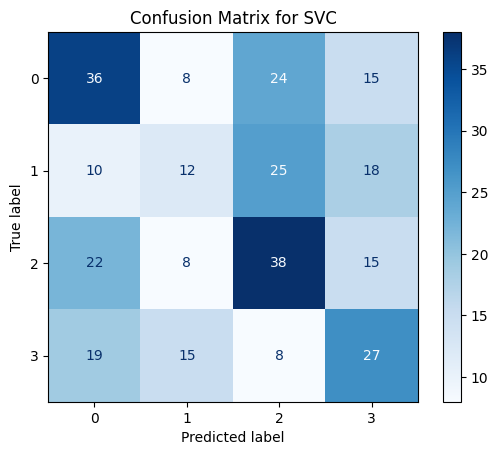

In [77]:
# Confusion matrix
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVC')
plt.show()

Does SVM classifier work much better than your percetron?

```
The SVM classifier performs better than the perceptron for multiclass classification. The SVM achieved a test accuracy of 37.67%, while the perceptron achieved only 26.67%. 
This improvement is probably due to SVM's ability to find optimal hyperplanes and handle non-linear separations using kernels, 
whereas the perceptron is limited to linear separations and is more prone to misclassification in complex datasets.
```

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




In [ ]:
# put your code here



Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University